<a href="https://colab.research.google.com/github/albordunos/AI_literacy/blob/main/Short_BibAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliometric Analysis / Библиометрический анализ

Recommendations from the following source were used to prepare the notebook: Donthu, N., Kumar, S., Mukherjee, D., Pandey, N., & Lim, W. M. (2021). How to conduct a bibliometric analysis: An overview and guidelines. Journal of business research, 133, 285-296.

При подготовке блокнота использовались рекомендации из следующего источника: Donthu, N., Kumar, S., Mukherjee, D., Pandey, N., & Lim, W. M. (2021). How to conduct a bibliometric analysis: An overview and guidelines. Journal of business research, 133, 285-296.


#Пояснение

##Publication-related metrics
* Total publications (TP)	Total publication of research constituent
* Publications from academia (TP-A)	Total publication of research constituent from academia
* Publications from industry (TP-I)	Total publication of research constituent from industry
* Publications from academia-industry collaboration (TP-AI)	Total publication of research constituent from academia-industry collaboration
* Number of contributing authors (NCA)	Total number of authors contributing to publications of research constituent
* Sole-authored publications (SA)	Total number of sole-authored publications by research constituent
* Co-authored publications (CA)	Total number of co-authored publications by research constituent
* Number of active years of publication (NAY)	Number of years that research constituent record a publication
* Productivity per active year of publication (PAY)	TP ÷ NAY

##Citation-related metrics
* Total citations (TC)	Total citations of research constituent
* Average citations (AC)	Average citations (e.g., per publication, per year, per period) of research constituent

#Citation-and-publication-related metrics
* Collaboration index (CI)	(NCA ÷ TP) ÷ TP (i.e., the extent of collaboration of research constituent)
* Collaboration coefficient (CC)	1 – (TP ÷ NCA) (i.e., standardizes the extent of author collaboration between 0 and 1)
* Number of cited publications (NCP)	Number of publications of research constituent that are cited
* Proportion of cited publications (PCP)	NCP ÷ TP
* Citations per cited publication (CCP)	TC for NCP
* h-index (h)	h number of publications cited at least h times (i.e., measure of influence)
* g-index (g)	g number of publications receiving at least g2 citations (i.e., measure of impact)
* i-index (i-10, i-100, i-200)	i number of publications cited at least i times (e.g., i = 10, 100, 200, etc.)

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter

# Установим необходимые библиотеки
!pip install pandas openpyxl matplotlib networkx pyvis

# Импорт данных из Excel
data = pd.read_excel('AILIT_SHORT.xlsx')

#Productivity analysis / Анализ продуктивности

Столбцы набора данных: Index(['Unnamed: 0', 'ID', 'Author1', 'AuthorFull', 'ID2', 'Title', 'Year',
       'Journal', 'Volume', 'Выпуск', 'Статья №', 'Страница начала',
       'Страница окончания', 'Pages', 'Citations', 'DOI', 'Ссылка', 'Abstract',
       'KeyWords', 'Keywords2', 'Sources', 'Type', 'СТАДИЯ ПУБЛИКАЦИИ',
       'Open Access (открытый доступ)', 'Unnamed: 24', 'EID', 'Quartile',
       'Frase in Title', 'Frase in Abstract', 'Frase in keywords', 'Q1-2',
       'Article', 'Type.1', 'Topic', 'FINAL_SAMPLE', 'Topic1', 'Topic2',
       'Topic3', 'Topic4', 'Topic1.1', 'Topic2.1', 'Topic3.1', 'Topic4.1'],
      dtype='object')
Количество публикаций по годам:
     Year  publications
0  2019.0             1
1  2020.0             1
2  2021.0             5
3  2022.0             6
4  2023.0            27
5  2024.0            67


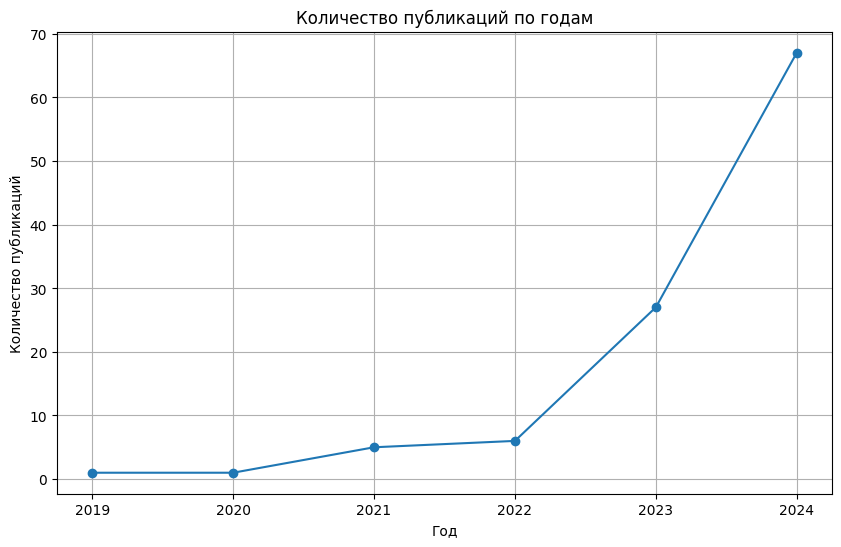

TP: 117
NCA: 117
SA: 117
CA: 0
NAY: 6
PAY: 19.5
TC: 1141.0
AC: 11.186274509803921
CI: 0.008547008547008548
CC: 0.0
NCP: 68
PCP: 0.5811965811965812
CCP: 16.779411764705884
h: 4
g: 4
i-10: 27
i-100: 2
i-200: 0


In [32]:
# Проверка столбцов в наборе данных
print("Столбцы набора данных:", data.columns)

# Подсчет количества публикаций по годам
pub_counts = data.groupby(data['Year'])['Title'].count().reset_index()
pub_counts.columns = ['Year', 'publications']
print('Количество публикаций по годам:')
print(pub_counts)

# Визуализация публикаций по годам
plt.figure(figsize=(10, 6))
plt.plot(pub_counts['Year'], pub_counts['publications'], marker='o')
plt.title('Количество публикаций по годам')
plt.xlabel('Год')
plt.ylabel('Количество публикаций')
plt.grid(True)
plt.show()

# Подсчет метрик продуктивности
metrics = {}

# Total publications (TP)
metrics['TP'] = data.shape[0]

# Если в данных нет столбца 'Authors', замените его на правильное имя
authors_column = 'Author1'  # Замените на правильное имя столбца, если оно другое

# Преобразование всех значений в столбце в строки и замена NaN на пустую строку
data[authors_column] = data[authors_column].fillna('').astype(str)

# Number of contributing authors (NCA)
metrics['NCA'] = data[authors_column].apply(lambda x: len(x.split(','))).sum()

# Sole-authored publications (SA)
metrics['SA'] = data[data[authors_column].apply(lambda x: len(x.split(',')) == 1)].shape[0]

# Co-authored publications (CA)
metrics['CA'] = data[data[authors_column].apply(lambda x: len(x.split(',')) > 1)].shape[0]

# Number of active years of publication (NAY)
metrics['NAY'] = data['Year'].nunique()

# Productivity per active year of publication (PAY)
metrics['PAY'] = metrics['TP'] / metrics['NAY']

# Citation-related metrics
# Total citations (TC)
metrics['TC'] = data['Citations'].sum()

# Average citations (AC)
metrics['AC'] = data['Citations'].mean()

# Citation-and-publication-related metrics
# Collaboration index (CI)
metrics['CI'] = (metrics['NCA'] / metrics['TP']) / metrics['TP']

# Collaboration coefficient (CC)
metrics['CC'] = 1 - (metrics['TP'] / metrics['NCA'])

# Number of cited publications (NCP)
metrics['NCP'] = data[data['Citations'] > 0].shape[0]

# Proportion of cited publications (PCP)
metrics['PCP'] = metrics['NCP'] / metrics['TP']

# Citations per cited publication (CCP)
cited_data = data[data['Citations'] > 0]
metrics['CCP'] = cited_data['Citations'].sum() / cited_data.shape[0]

# h-index (h)
sorted_citations = sorted(data['Citations'], reverse=True)
h_index = 0
for i, c in enumerate(sorted_citations):
    if c >= i + 1:
        h_index = i + 1
    else:
        break
metrics['h'] = h_index

# g-index (g)
g_index = 0
cumsum = 0
for i, c in enumerate(sorted_citations):
    cumsum += c
    if cumsum >= (i + 1)**2:
        g_index = i + 1
    else:
        break
metrics['g'] = g_index

# i-index (i-10, i-100, i-200)
metrics['i-10'] = sum(1 for c in data['Citations'] if c >= 10)
metrics['i-100'] = sum(1 for c in data['Citations'] if c >= 100)
metrics['i-200'] = sum(1 for c in data['Citations'] if c >= 200)

# Вывод метрик
for key, value in metrics.items():
    print(f'{key}: {value}')


Топ-10 авторов по количеству публикаций:
                   10
Kong S.-C.          5
Laupichler M.C.     5
Su J.               5
 Aster A.           4
 Raupach T.         4
Chai C.S.           3
 Chiu T.K.F.        3
 Breazeal C.        3
 DiPaola D.         3
Name: count, dtype: int64


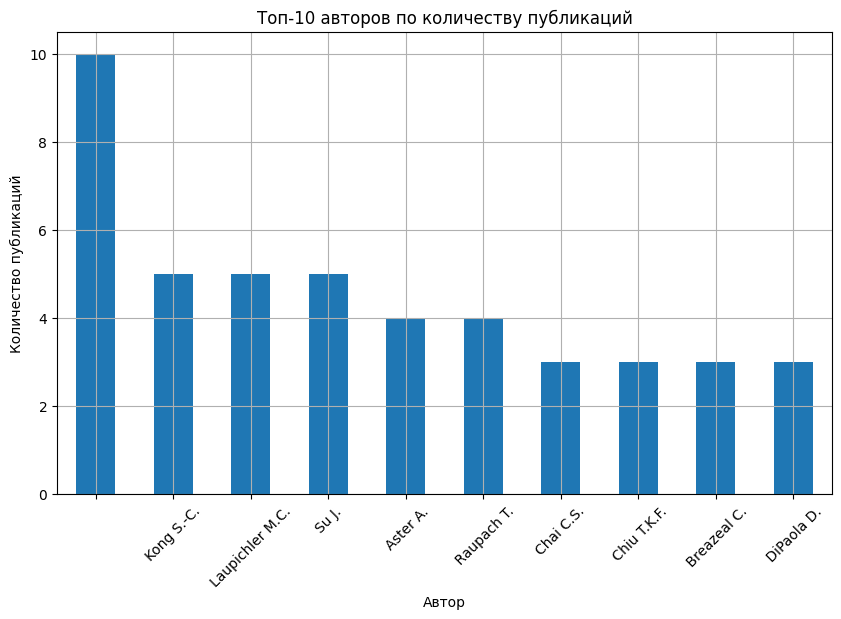


Топ-10 журналов по количеству публикаций:
Journal
Computers and Education: Artificial Intelligence                       12
Education and Information Technologies                                 10
Information and Learning Science                                        5
Education Sciences                                                      4
Humanities and Social Sciences Communications                           3
International Journal of Educational Technology in Higher Education     3
International Journal of Technology and Design Education                3
Business and Professional Communication Quarterly                       3
Educational Technology and Society                                      3
International Journal of Artificial Intelligence in Education           3
Name: count, dtype: int64


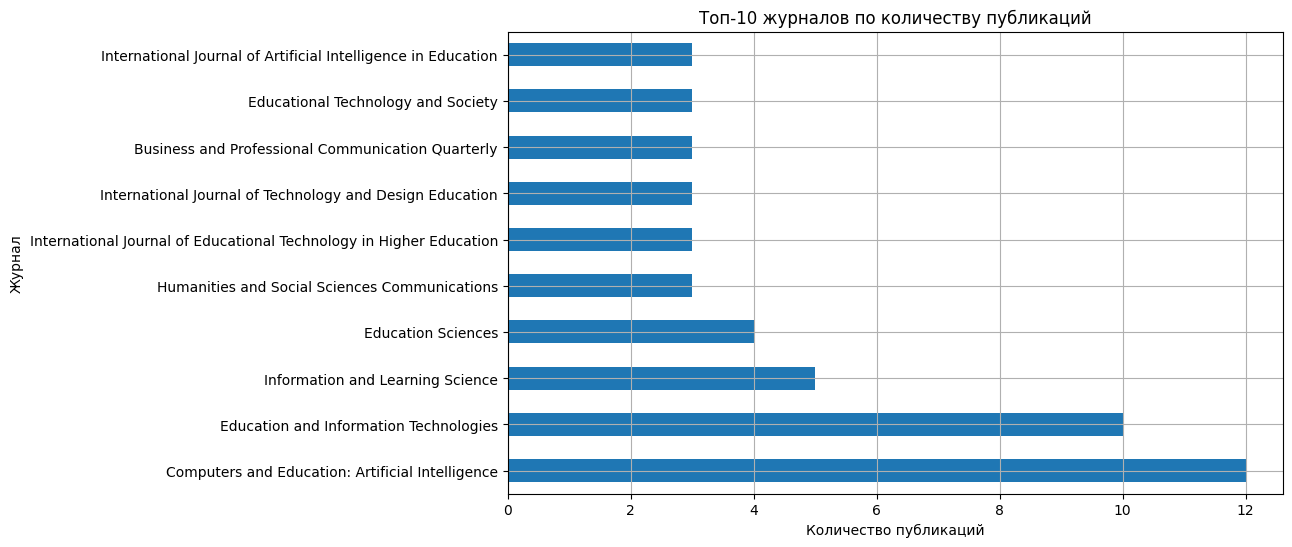


Количество публикаций в Q1 журналах: 88
Количество публикаций в Q2 журналах: 19


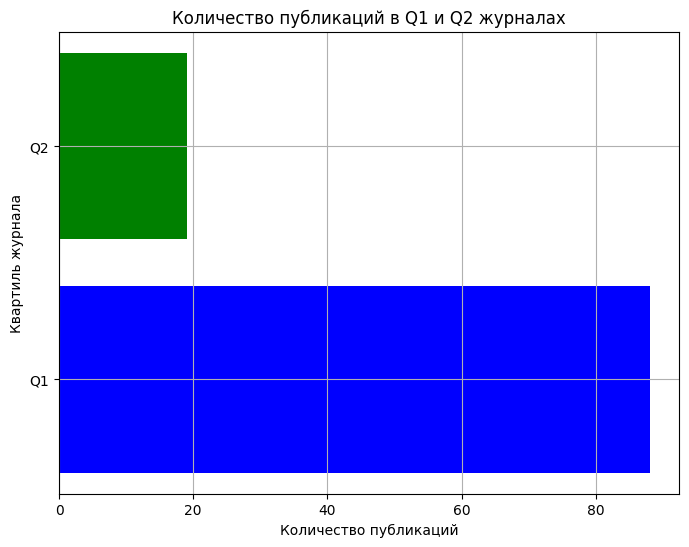


Топ-10 ключевых слов:
ai literacy                     23
artificial intelligence         22
generative ai                    9
chatgpt                          7
early childhood education        5
artificial intelligence (ai)     5
literacy                         5
assessment                       4
ethics                           4
curriculum                       4
Name: count, dtype: int64


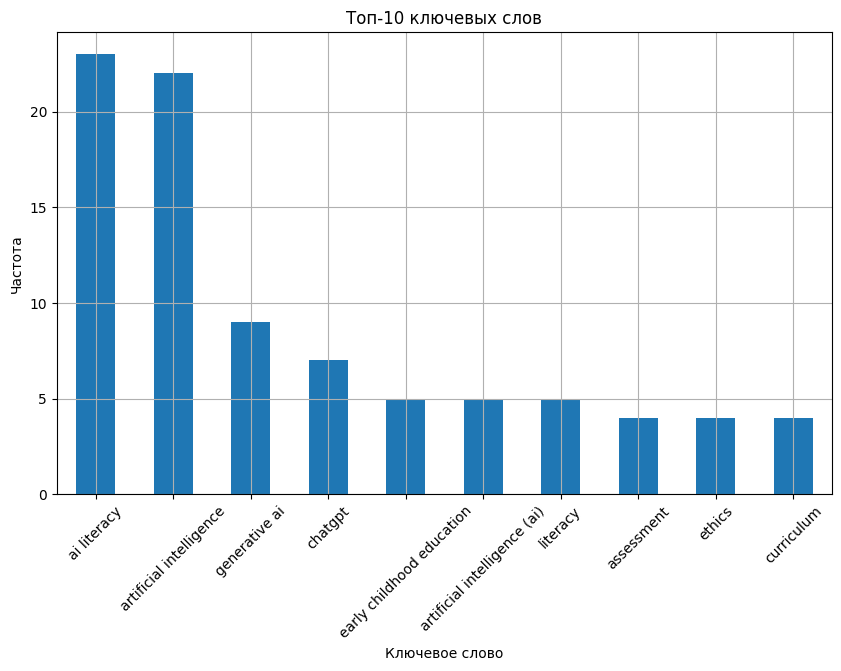


Топ-10 цитирований:
19: Ng D.T.K., Leung J.K.L., Chu S.K.W., Qiao M.S., Conceptualizing AI literacy: An exploratory review, Computers and Education: Artificial Intelligence, 2, (2021)
17: Long D., Magerko B., What is AI literacy? Competencies and design considerations, Proceedings of the 2020 CHI Conference on Human Factors in Computing Systems, pp. 1-16, (2020)
11: Long D., Magerko B., What is AI literacy? Competencies and design considerations, Proceedings of the 2020 CHI conference on human factors in computing systems, pp. 1-16, (2020)
11: Ng D.T.K., Leung J.K.L., Chu K.W.S., Qiao M.S., AI literacy: Definition, teaching, evaluation and ethical issues, Proceedings of the Association for Information Science and Technology, 58, 1, pp. 504-509, (2021)
8: Ng D.T.K., Luo W., Chan H.M.Y., Chu S.K.W., Using digital story writing as a pedagogy to develop AI literacy among primary students, Computers and Education: Artificial Intelligence, 3, (2022)
8: Fornell C., Larcker D.F., Evaluating s

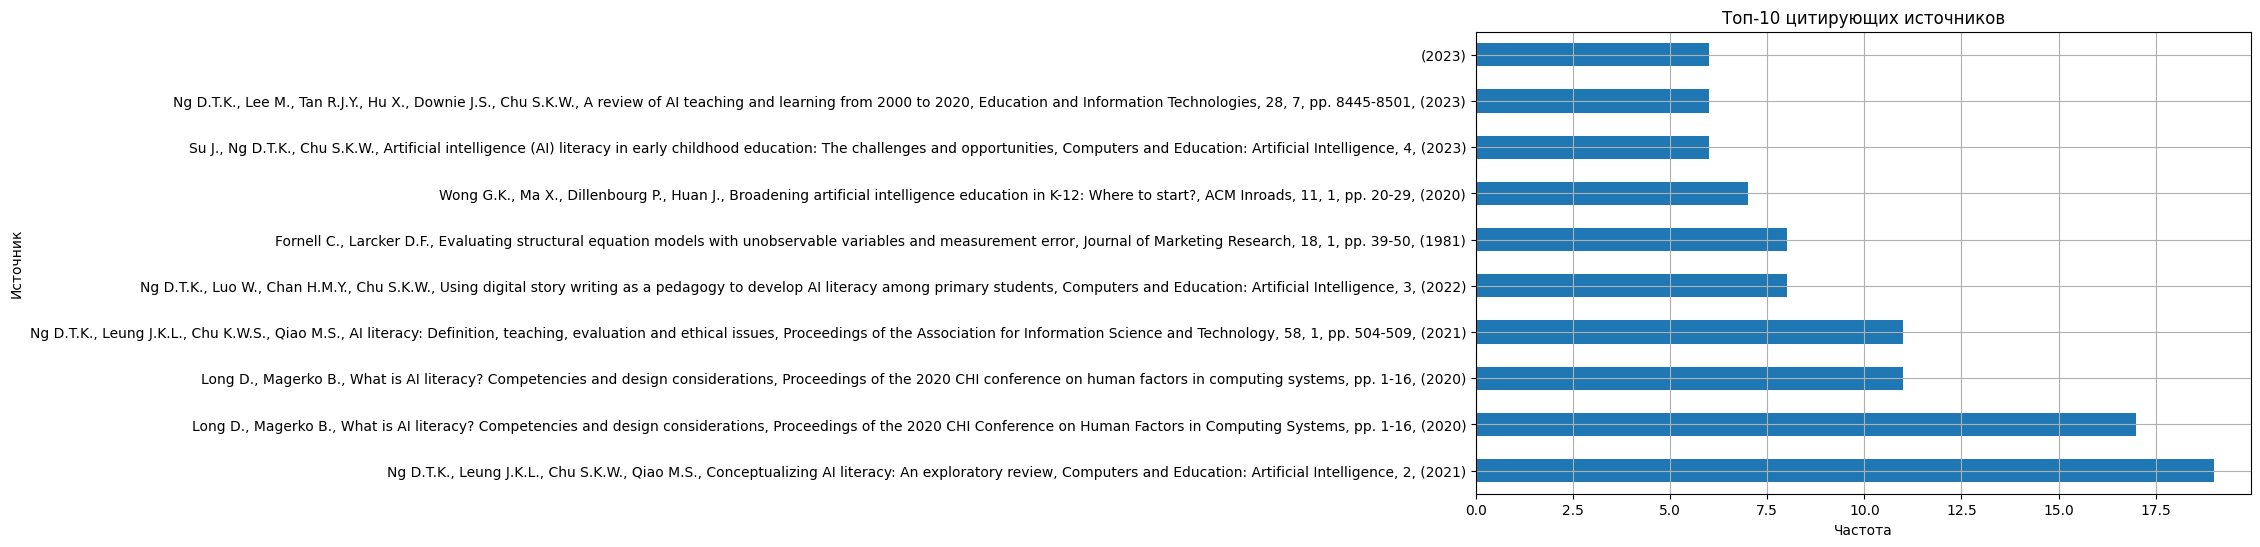


Количество уникальных авторов: 301

Количество публикаций единоличных авторов: 28

Collaboration Index (CI): 3.12

Citations per Publication (CPP): 1.00

H-индекс: 1

Импакт-фактор: 1.00


In [33]:
# Топ-10 авторов по количеству публикаций
author_counts = data['Author1'].str.split(';', expand=True).stack().value_counts()
top_authors = author_counts.head(10)
print('\nТоп-10 авторов по количеству публикаций:')
print(top_authors)

# Визуализация топ-10 авторов
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Топ-10 авторов по количеству публикаций')
plt.xlabel('Автор')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Топ-10 журналов по количеству публикаций
journal_counts = data['Journal'].value_counts().head(10)
print('\nТоп-10 журналов по количеству публикаций:')
print(journal_counts)

# Визуализация топ-10 журналов
plt.figure(figsize=(10, 6))
journal_counts.plot(kind='barh')
plt.title('Топ-10 журналов по количеству публикаций')
plt.xlabel('Количество публикаций')
plt.ylabel('Журнал')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Количество публикаций в Q1 и Q2 журналах
q1_count = data[data['Quartile'] == 'Q1'].shape[0]
q2_count = data[data['Quartile'] == 'Q2'].shape[0]
print(f'\nКоличество публикаций в Q1 журналах: {q1_count}')
print(f'Количество публикаций в Q2 журналах: {q2_count}')

# Визуализация количества публикаций в Q1 и Q2 журналах
plt.figure(figsize=(8, 6))
plt.barh(['Q1', 'Q2'], [q1_count, q2_count], color=['blue', 'green'])
plt.title('Количество публикаций в Q1 и Q2 журналах')
plt.xlabel('Количество публикаций')
plt.ylabel('Квартиль журнала')
plt.grid(True)
plt.show()

# Топ-10 ключевых слов из столбцов KeyWords
all_keywords = pd.Series(data['KeyWords'].dropna().str.lower().sum())
top_keywords = all_keywords.str.split(';').explode().str.strip().value_counts().head(10)
print('\nТоп-10 ключевых слов:')
print(top_keywords)

# Визуализация топ-10 ключевых слов
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar')
plt.title('Топ-10 ключевых слов')
plt.xlabel('Ключевое слово')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Топ-10 цитирующих источников из столбца Sources
citations = data['Sources'].dropna().astype(str).str.split(';').explode().str.strip().value_counts()
top_citations = citations.head(10)

print('\nТоп-10 цитирований:')
for source, count in top_citations.items():
    print(f'{count}: {source}')

# Визуализация топ-10 цитирующих источников
plt.figure(figsize=(10, 6))
top_citations.plot(kind='barh')
plt.title('Топ-10 цитирующих источников')
plt.xlabel('Частота')
plt.ylabel('Источник')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Подсчет количества уникальных авторов
unique_authors = data['Author1'].dropna().str.split(';').explode().str.strip().unique()
number_of_contributing_authors = len(unique_authors)
print(f'\nКоличество уникальных авторов: {number_of_contributing_authors}')

# Подсчет публикаций единоличных авторов
sole_authors_count = data[data['Author1'].str.split(';').str.len() == 1].shape[0]
print(f'\nКоличество публикаций единоличных авторов: {sole_authors_count}')

# Индекс сотрудничества
author_columns = [col for col in data.columns if col.startswith('Author1')]
all_authors = data[author_columns].apply(lambda x: ';'.join(x.dropna()), axis=1)
author_counts = all_authors.str.split(';').apply(lambda x: len(x))
collaboration_index = author_counts.mean()
print(f'\nCollaboration Index (CI): {collaboration_index:.2f}')

# Подсчет количества цитирований для каждой публикации
citations = data['Citations'].astype(str).str.replace(',', '').str.replace('\n', '').str.split(';')
per_publication_citations = citations.apply(lambda x: len(x))

# Подсчет общего количества цитирований
total_citations = per_publication_citations.sum()
# Подсчет общего количества публикаций
total_publications = data.shape[0]
# Вычисление Citations per Publication (CPP)
cpp = total_citations / total_publications
print(f'\nCitations per Publication (CPP): {cpp:.2f}')

# Вычисление H-индекса
h_index = 0
for i in range(total_publications):
    citations_per_publication = per_publication_citations.iloc[i]
    if citations_per_publication >= i + 1:
        h_index = i + 1
print(f'\nH-индекс: {h_index}')

# Вычисление Импакт-фактора
impact_factor = total_citations / total_publications
print(f'\nИмпакт-фактор: {impact_factor:.2f}')

# Дополнительные метрики

# Publication-related metrics
def calculate_publication_metrics(data):
    metrics = {}

    # Total publications (TP)
    metrics['TP'] = len(data)

    # Number of contributing authors (NCA)
    metrics['NCA'] = data['Author1'].str.split(';').explode().nunique()

    # Sole-authored publications (SA)
    metrics['SA'] = sole_authors_count

    # Co-authored publications (CA)
    metrics['CA'] = metrics['TP'] - metrics['SA']

    # Number of active years of publication (NAY)
    metrics['NAY'] = data['Year'].nunique()

    # Productivity per active year of publication (PAY)
    metrics['PAY'] = metrics['TP'] / metrics['NAY']

    return metrics

# Citation-related metrics
def calculate_citation_metrics(data):
    metrics = {}

    # Total citations (TC)
    metrics['TC'] = total_citations

    # Average citations (AC)
    metrics['AC'] = cpp

    return metrics

# Citation-and-publication-related metrics
def calculate_combined_metrics(data, pub_metrics):
    metrics = {}

    # Collaboration index (CI)
    metrics['CI'] = (pub_metrics['NCA'] / pub_metrics['TP']) / pub_metrics['TP']

    # Collaboration coefficient (CC)
    metrics['CC'] = 1 - (pub_metrics['TP'] / pub_metrics['NCA'])

    # Number of cited publications (NCP)
    metrics['NCP'] = len(data[data['Citations'].astype(str).str.replace(',', '').str.replace('\n', '').str.split(';').apply(len) > 0])

    # Proportion of cited publications (PCP)
    metrics['PCP'] = metrics['NCP'] / pub_metrics['TP']

    # Citations per cited publication (CCP)
    metrics['CCP'] = total_citations / metrics['NCP'] if metrics['NCP'] > 0 else 0

    # h-index (h)
    metrics['h'] = h_index

    # g-index (g)
    citations_sorted = sorted(per_publication_citations, reverse=True)
    g_index = 0
    cumsum = 0
    for i, count in enumerate(citations_sorted):
        cumsum += count
        if cumsum >= (i + 1)**2:
            g_index = i + 1
        else:
            break
    metrics['g'] = g_index
